In [2]:
import pandas as pd

df = pd.read_csv('c:/data/Data/ozone/ozone2.csv')
df.head()

,Solar.R,Wind,Temp,Ozone,Result
0,190.000000,7.4,67,67,0
1,118.000000,8.0,72,72,0
2,149.000000,12.6,74,74,0
3,313.000000,11.5,62,62,0
4,185.931507,14.3,56,56,0


In [3]:
df.columns

Index(['Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

In [4]:
df.shape

(153, 5)

In [5]:
df.describe

<bound method NDFrame.describe of         Solar.R  Wind  Temp  Ozone  Result
0    190.000000   7.4    67     67       0
1    118.000000   8.0    72     72       0
2    149.000000  12.6    74     74       0
3    313.000000  11.5    62     62       0
4    185.931507  14.3    56     56       0
..          ...   ...   ...    ...     ...
148  193.000000   6.9    70     70       0
149  145.000000  13.2    77     77       0
150  191.000000  14.3    75     75       0
151  131.000000   8.0    76     76       0
152  223.000000  11.5    68     68       0

[153 rows x 5 columns]>

In [6]:
df.groupby('Result').mean()

,Solar.R,Wind,Temp,Ozone
Result,,,,
0,180.467566,11.082353,71.367647,71.367647
1,190.302659,9.057647,83.094118,83.094118


In [7]:
df['Result'].value_counts()

1    85
0    68
Name: Result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

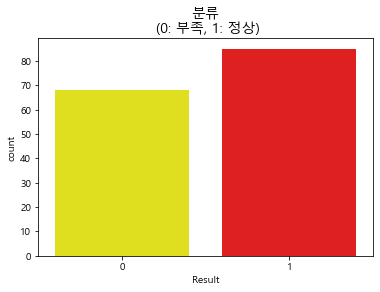

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

colors = ['yellow', 'red']

sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [9]:
cols = ['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

array([[<AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Result', ylabel='Solar.R'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Wind'>,
        <AxesSubplot:xlabel='Result', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplot:xlabel='Temp', ylabel='Temp'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Temp'>,
        <AxesSubplot:xlabel='Result', ylabel='Temp'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Wind', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Temp', ylabel='Ozone'>,
        <AxesSubplot:x

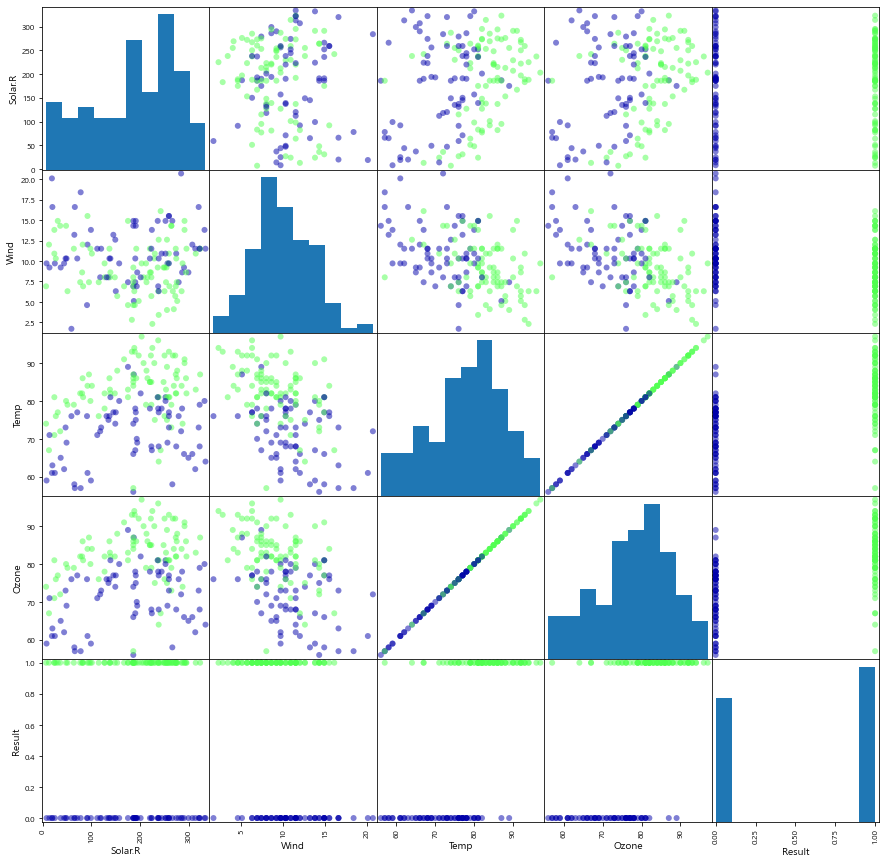

In [12]:
import mglearn
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)

In [13]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [14]:
#오버샘플링
from imblearn.over_sampling import SMOTE

X_sample, y_sample = SMOTE(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [15]:
df_samp['Result'].value_counts()

0    85
1    85
Name: Result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

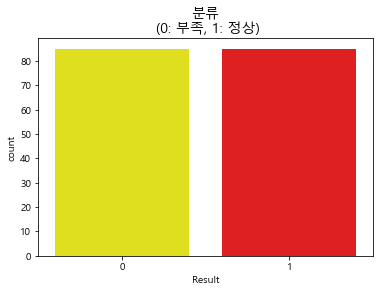

In [16]:
colors = ['yellow', 'red']

sns.countplot('Result', data=df_samp, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [18]:
print(cols)

['Solor.R', 'Wind', 'Temp']


In [19]:
cols = ['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['Result']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

Text(0.5, 0, 'number of clusters')

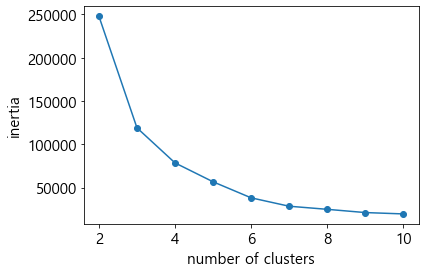

In [21]:
#최적의 클러스터 개수 구하기
#inertia value : 군집화 후 각 중심점에서 군집 데이터간의 거리 합산값
# 작을수록 응집도가 높은 군집
from sklearn.cluster import KMeans

clusters = range(2,11)
inertias=[]

for n in clusters:
    # 모델 생성
    model = KMeans(n_clusters=n, random_state=10)
    model.fit(X_train)
    inertias.append(model.inertia_)

plt.rcParams['font.size']=15
plt.plot(clusters, inertias, '-o')
plt.ylabel('inertia')
plt.xlabel('number of clusters')

#엘보우기법 : 팔꿈치처럼 꺽이는부분이 3, 3개의 클러스터로 분류


In [22]:
model = KMeans(n_clusters=3, random_state=10)
print(model)
pred = model.fit_predict(X_train)
print(pred[:5])
pred = model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[2 0 0 0 0]
[1 0 0 1 1]


In [23]:
#군집화에서는 개별 바렙로다 군집이 중요
#실루엣은 한 클러스터 내부의 데이터가 다른 클러스터와 비교해 얼마나 비슷한가를 나타냄
#ai : i와 같은 군집에 속한 원소들의 평균거리
#bi : i와 같은 군집 중 가장 가까운 군집까지의 평균 거리
#실루엣 계수가 높을수록 좋음
# 군집의 형상이 복잡하거나 크기의 차이가 많으면 비교가 어려움
from sklearn.metrics import silhouette_score
silhouette_score(X_test, pred)

0.4948601489872203

In [24]:
model = KMeans(n_clusters=2, random_state=10)
print(model)
pred = model.fit_predict(X_train)
print(pred[:5])
pred = model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[1 0 0 0 0]
[1 0 0 1 1]


In [25]:
silhouette_score(X_test, pred)

0.6004430523965693

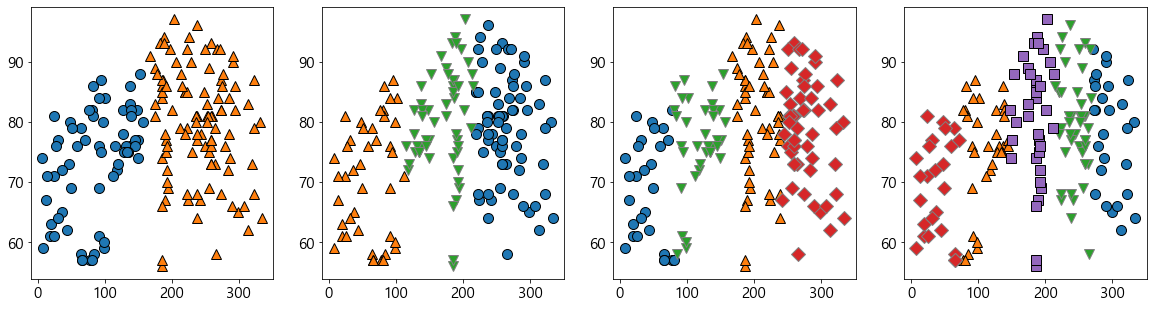

In [27]:
from matplotlib import pyplot as pyplot

fig, axes = plt.subplots(1,4,figsize=(20,5))

idx=0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_

    mglearn.discrete_scatter(X['Solar.R'], X["Temp"], lbls, ax=axes[idx])
    idx += 1